<a href="https://colab.research.google.com/github/Sanddeep-K/Capstone-2_Retail_Sales_Prediction/blob/main/Capstone_2_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction
-----
-----



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

------

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Problem Statement :

-----

Rossmann operates over 3,000 drug stores in 7 European countries. being a Data Analyst for Rossman, I have been asked to perform below activities,

1. Predicting their daily sales for up to six weeks in advance
2. identify factors influencing sales like promotions / competitions / school & state holidays / seasonality and locality
3. forecast the most accurate sales column for the given test set

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

------
------

## ***1. Know Your Data***

-----

### Import Libraries

-----

In [ ]:
# Importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

-----

**Mounted Google Drive**

In [ ]:
# --------------------------------------------------------------------------------------------------------------------------

# Let's mount Google Drive first i.e. depository of datasets

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# --------------------------------------------------------------------------------------------------------------------------

Mounted at /content/drive/


**Imported Datasets**

In [ ]:
# --------------------------------------------------------------------------------------------------------------------------

# Importing the file path and datasets for analysis.

store_data = ('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction/Datasets/store.csv')
ross_data = ('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction/Datasets/Rossmann Stores Data.csv')

store_df = pd.read_csv(store_data)                                              # Dataset 1 - Other Stores Data
ross_df = pd.read_csv(ross_data)                                                # Dataset 2 - Rossmann Stores Data

# --------------------------------------------------------------------------------------------------------------------------

### Dataset First View

-----

### **Dataset - 1** : Let's check "Store" Dataset

----------

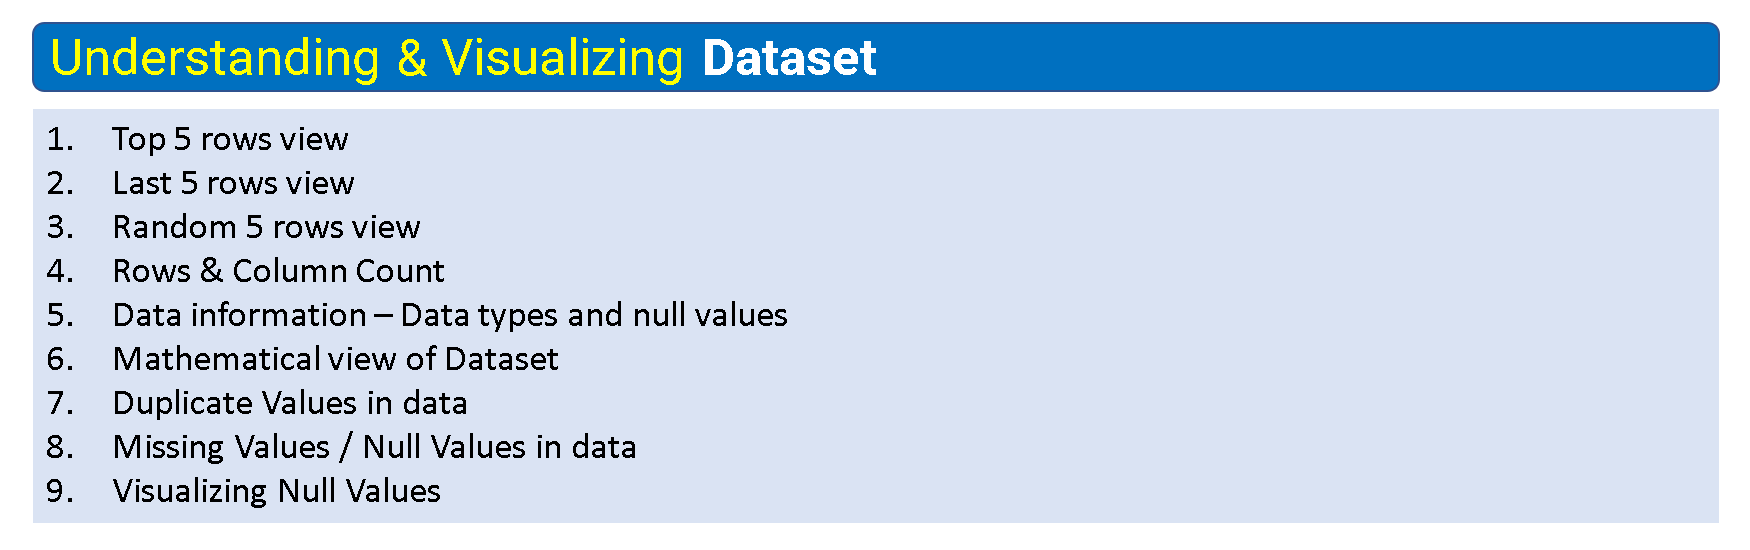

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


**Random View of Dataset**

-----

In [ ]:
store_df.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
55,56,d,c,6620.0,3.0,2012.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
474,475,a,a,140.0,9.0,2005.0,0,NaN,NaN,NaN
776,777,d,c,8250.0,10.0,2004.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"
545,546,a,a,580.0,1.0,2005.0,0,NaN,NaN,NaN
417,418,a,a,1060.0,5.0,2009.0,1,27.0,2011.0,"Feb,May,Aug,Nov"


### Dataset Rows & Columns count

------

In [ ]:
store_df.shape

(1115, 10)

### Dataset Information

-----

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Mathematical View of Data**

-----

In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### Duplicate Values

-----

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def store_1():
  temp = pd.DataFrame(index =store_df.columns)
  temp['Data_Type'] = store_df.dtypes
  temp['Duplicate_Count'] = store_df.duplicated().sum()
  return temp
store_1()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Duplicate_Count
Store,int64,0
StoreType,object,0
Assortment,object,0
CompetitionDistance,float64,0
CompetitionOpenSinceMonth,float64,0
CompetitionOpenSinceYear,float64,0
Promo2,int64,0
Promo2SinceWeek,float64,0
Promo2SinceYear,float64,0
PromoInterval,object,0


#### Missing Values/Null Values

-----

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def store_1():
  temp = pd.DataFrame(index =store_df.columns)
  temp['Data_Type'] = store_df.dtypes
  temp['Unique_Count'] = store_df.nunique()
  temp['Count']= store_df.isnull().count()
  temp['Missing_Count'] = store_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2)
  return temp
store_1()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
Store,int64,1115,1115,0,0.00
StoreType,object,4,1115,0,0.00
Assortment,object,3,1115,0,0.00
CompetitionDistance,float64,654,1115,3,0.27
CompetitionOpenSinceMonth,float64,12,1115,354,31.75
CompetitionOpenSinceYear,float64,23,1115,354,31.75
Promo2,int64,2,1115,0,0.00
Promo2SinceWeek,float64,24,1115,544,48.79
Promo2SinceYear,float64,7,1115,544,48.79
PromoInterval,object,3,1115,544,48.79


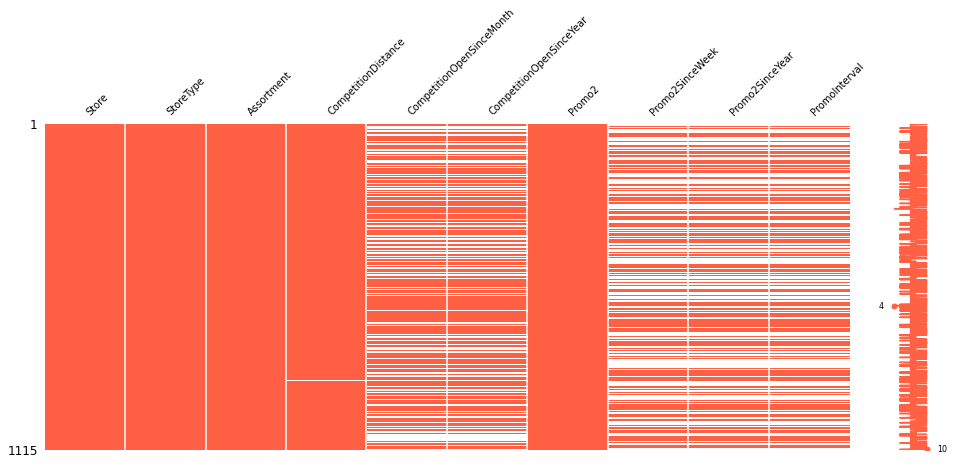

In [ ]:
# Visualizing the missing values

msno.matrix(store_df,figsize=(16,6), color=(1, 0.38, 0.27), fontsize=10)

-----

**Observation** - Below 6 columns shows missing values heavily,

1. CompetitionOpenSinceMonth
2. CompetitionOpenSinceYear
3. Promo2SinceWeek
4. Promo2SinceYear
5. PromoInterval
6. CompetitionDistance
**Let's check their quantum with the help of Bar graph,**

-----

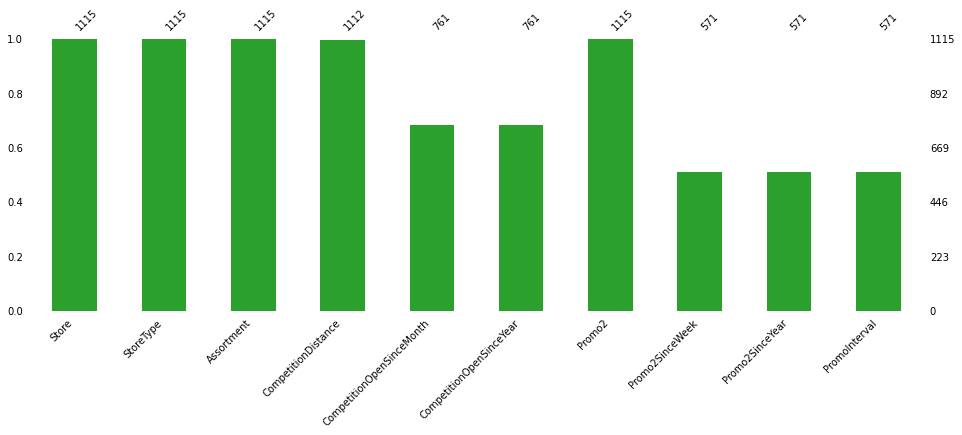

In [ ]:
msno.bar(store_df,figsize=(16,5), color="tab:green", fontsize=10)

### What did you know about your dataset?

-----

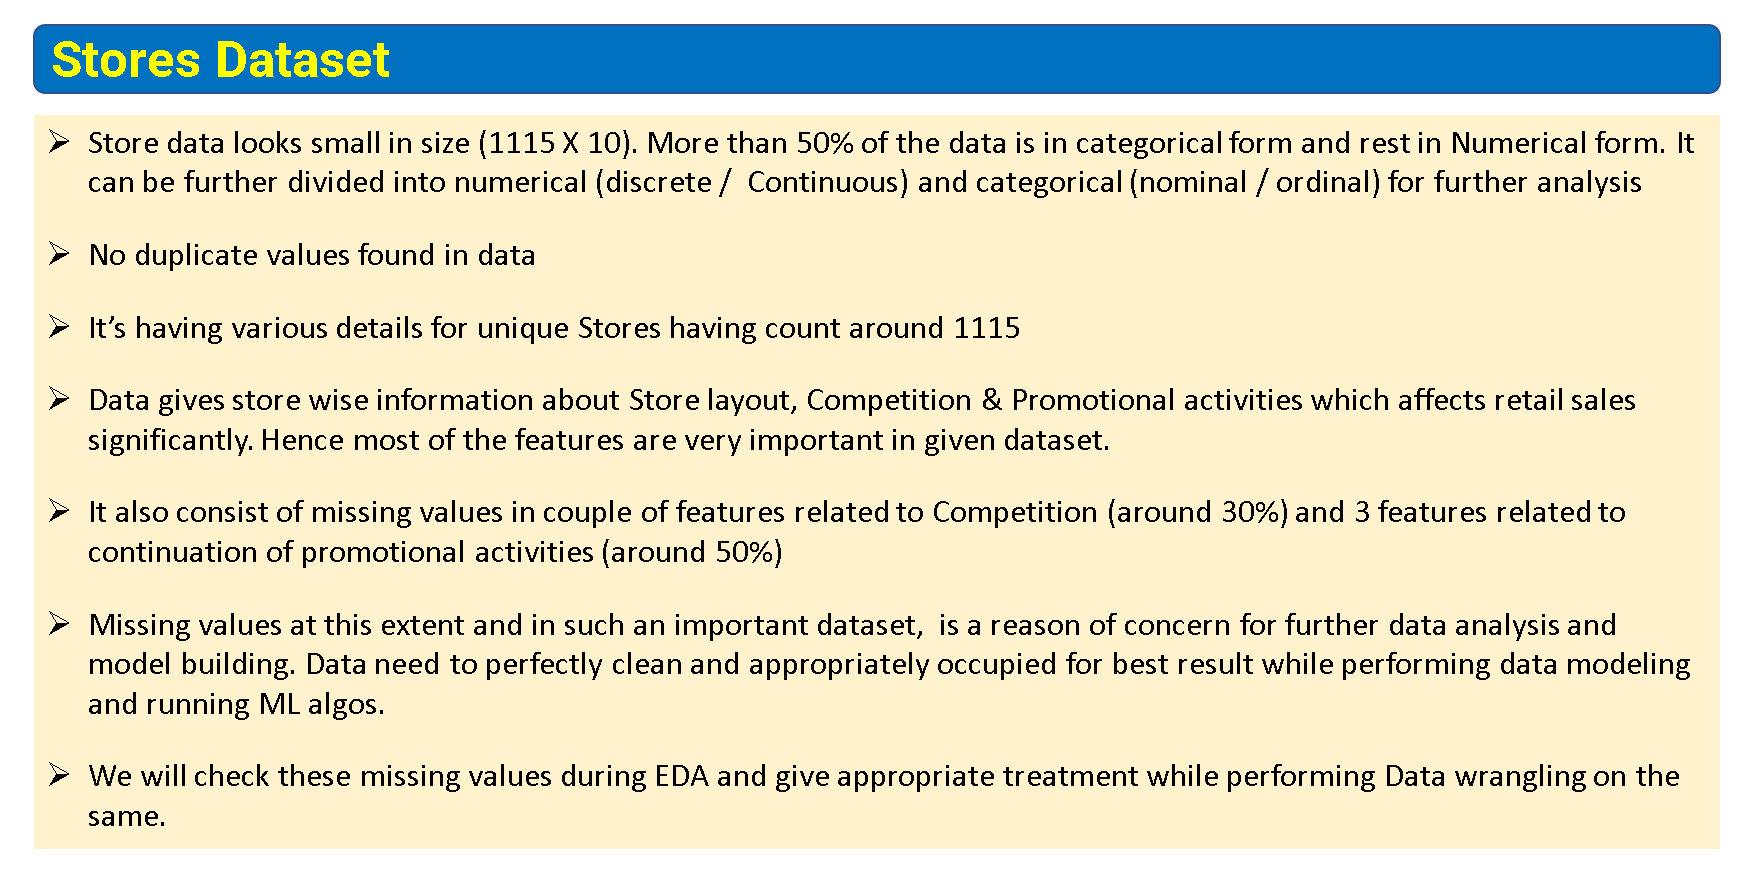

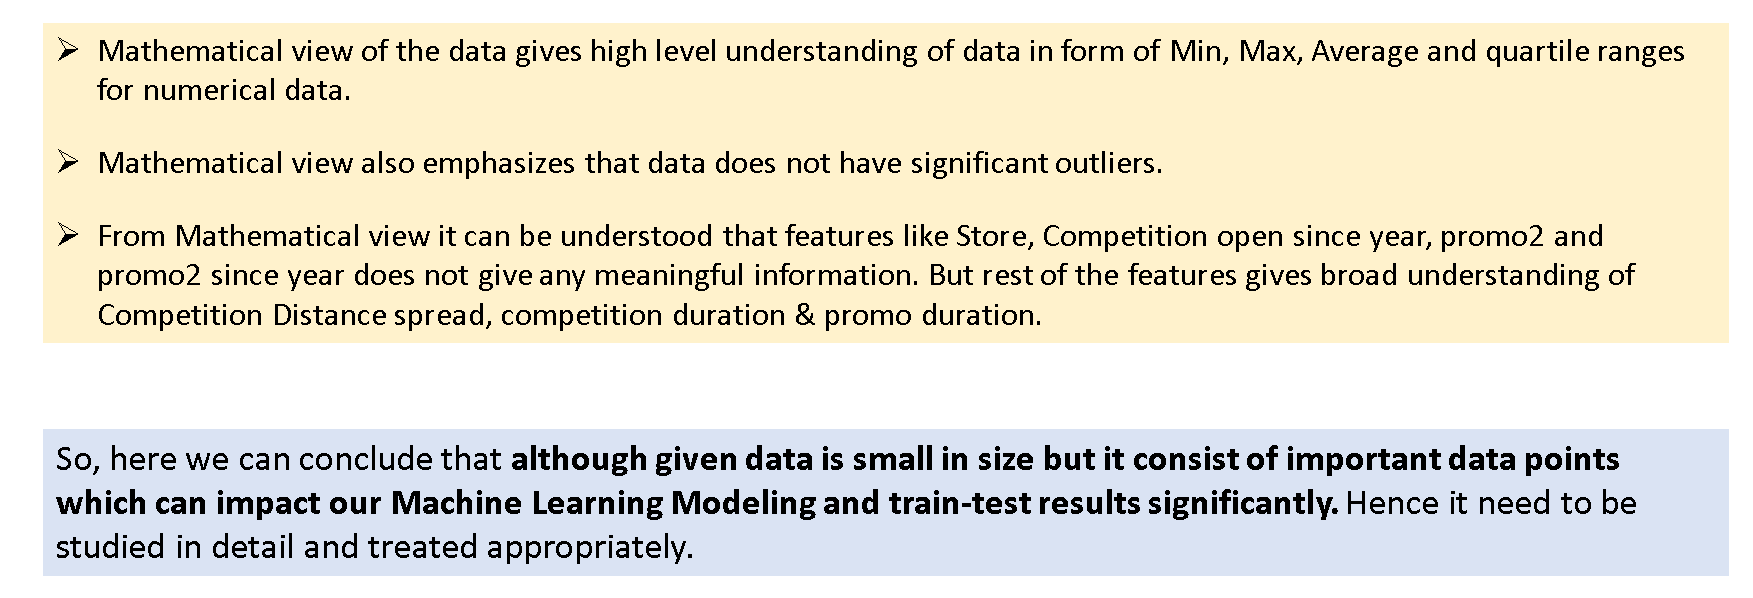

-----

###**Dataset - 2**:    Let's check "Rossmann" Dataset

----------

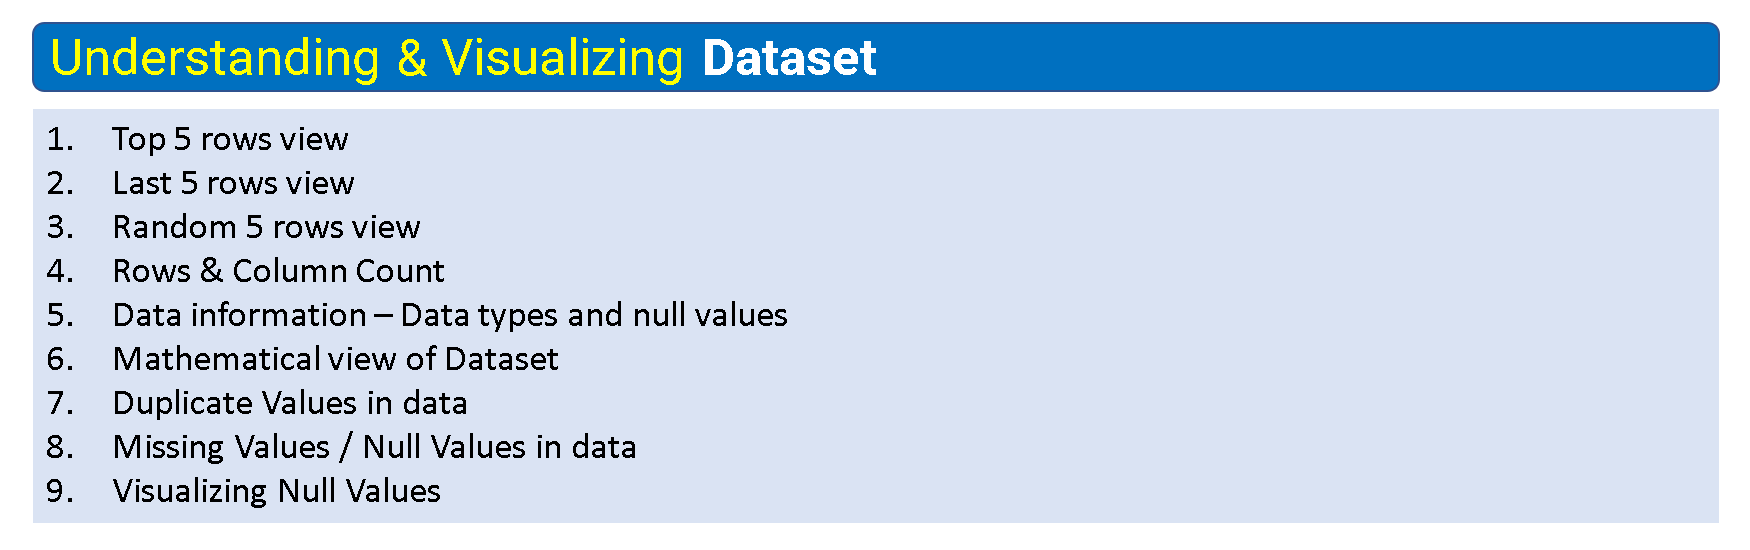

In [ ]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [ ]:
ross_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


**Random View of Dataset**

-----

In [ ]:
ross_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
870981,952,7,12-05-2013,0,0,0,0,0,0
904564,1085,5,12-04-2013,9405,922,1,1,0,0
784910,736,7,28-07-2013,0,0,0,0,0,0
978269,85,1,04-02-2013,8018,1066,1,1,0,1
656089,140,3,20-11-2013,7884,983,1,1,0,0


### Dataset Rows & Columns count

------

In [ ]:
ross_df.shape

(1017209, 9)

### Dataset Information

-----

In [ ]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Mathematical View of Data**

-----

In [ ]:
ross_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### Duplicate Values

-----

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def ross_1():
  temp = pd.DataFrame(index =store_df.columns)
  temp['Data_Type'] = ross_df.dtypes
  temp['Duplicate_Count'] = ross_df.duplicated().sum()
  return temp
ross_1()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Duplicate_Count
Store,int64,0
StoreType,NaN,0
Assortment,NaN,0
CompetitionDistance,NaN,0
CompetitionOpenSinceMonth,NaN,0
CompetitionOpenSinceYear,NaN,0
Promo2,NaN,0
Promo2SinceWeek,NaN,0
Promo2SinceYear,NaN,0
PromoInterval,NaN,0


#### Missing Values/Null Values

-----

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def ross_1():
  temp = pd.DataFrame(index =ross_df.columns)
  temp['Data_Type'] = ross_df.dtypes
  temp['Unique_Count'] = ross_df.nunique()
  temp['Count']= ross_df.isnull().count()
  temp['Missing_Count'] = ross_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2)
  return temp
ross_1()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
Store,int64,1115,1017209,0,0.0
DayOfWeek,int64,7,1017209,0,0.0
Date,object,942,1017209,0,0.0
Sales,int64,21734,1017209,0,0.0
Customers,int64,4086,1017209,0,0.0
Open,int64,2,1017209,0,0.0
Promo,int64,2,1017209,0,0.0
StateHoliday,object,5,1017209,0,0.0
SchoolHoliday,int64,2,1017209,0,0.0


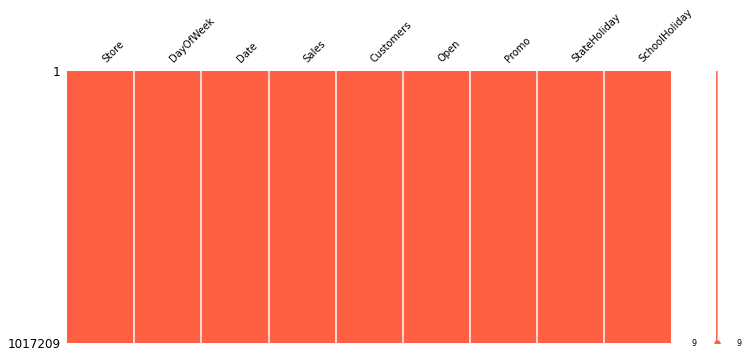

In [ ]:
# Visualizing the missing values

msno.matrix(ross_df,figsize=(12,5), color=(1, 0.38, 0.27), fontsize=10)

--------

**Observation** - No missing values visible in Rossmann Sales Data, still just to confirm let's check it in numbers with the help of Bar Graph

--------

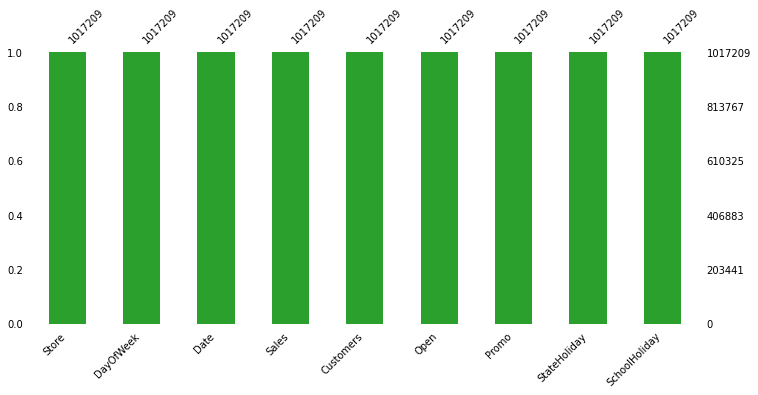

In [ ]:
msno.bar(ross_df,figsize=(12,5), color="tab:green", fontsize=10)

-------

**Observation** - No missing values found in Rossmann Sales Data


------

### What did you know about your dataset?

------

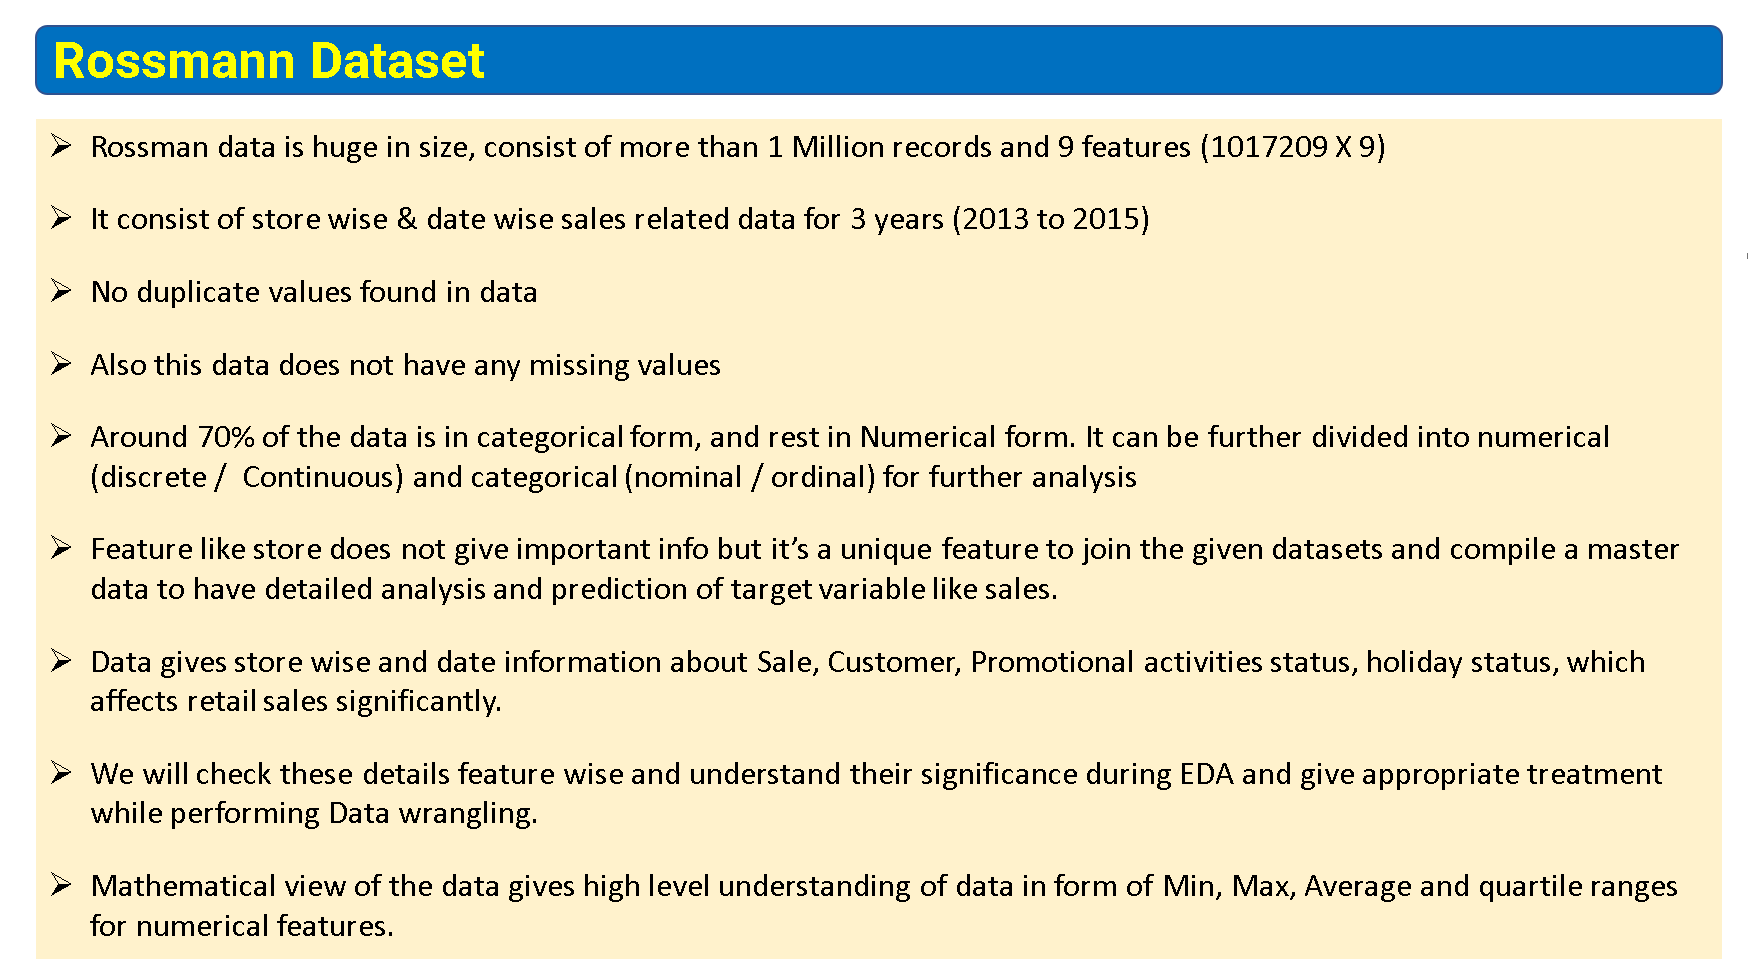

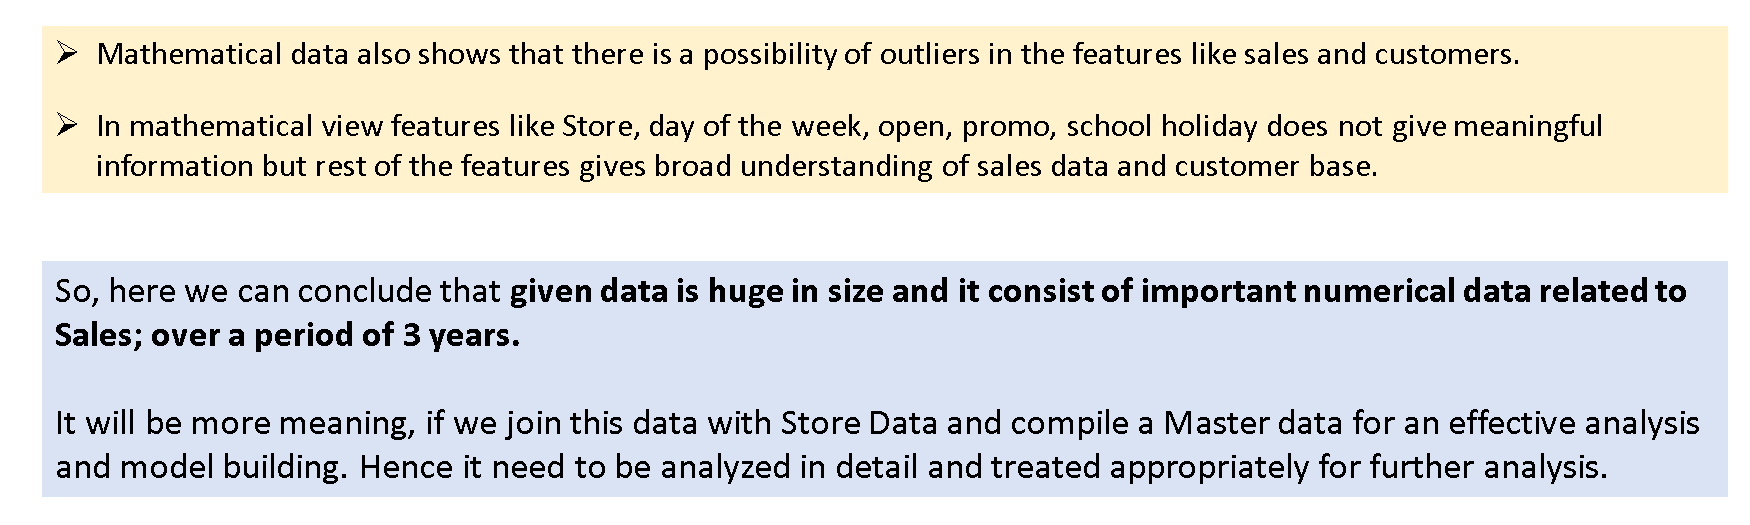

## ***2. Understanding Your Variables***

------

In [ ]:
# Dataset Columns

store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Columns

ross_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe

store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
ross_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

-------

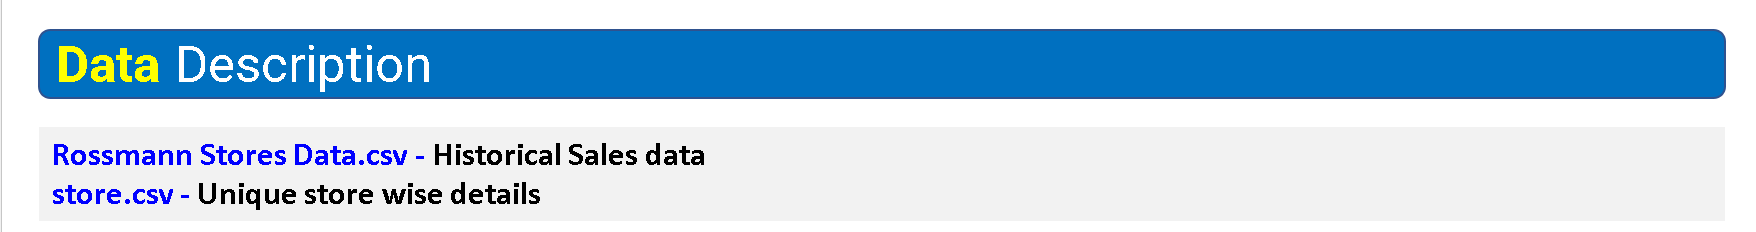





### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

-----

**Store Data Variables (Unique Values)**

------

In [ ]:
# Check Unique Values for each variable.

col_store = store_df.columns
col_store

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.

#checking the unique values involved and if all the values are in appropriate datatypes
for col in col_store:
  
  print(f'Unique values for {col}: {store_df[col].unique()}')

Unique values for Store: [   1    2    3 ... 1113 1114 1115]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionDistance: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.800e+

**Rossmann Data Variables (Unique Values)**

------

In [ ]:
col_ross = ross_df.columns
col_ross

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.

#checking the unique values involved and if all the values are in appropriate datatypes
for col in col_ross:
  
  print(f'Unique values for {col}: {ross_df[col].unique()}')

Unique values for Store: [   1    2    3 ... 1113 1114 1115]
Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Date: ['31-07-2015' '30-07-2015' '29-07-2015' '28-07-2015' '27-07-2015'
 '26-07-2015' '25-07-2015' '24-07-2015' '23-07-2015' '22-07-2015'
 '21-07-2015' '20-07-2015' '19-07-2015' '18-07-2015' '17-07-2015'
 '16-07-2015' '15-07-2015' '14-07-2015' '13-07-2015' '12-07-2015'
 '11-07-2015' '10-07-2015' '09-07-2015' '08-07-2015' '07-07-2015'
 '06-07-2015' '05-07-2015' '04-07-2015' '03-07-2015' '02-07-2015'
 '01-07-2015' '30-06-2015' '29-06-2015' '28-06-2015' '27-06-2015'
 '26-06-2015' '25-06-2015' '24-06-2015' '23-06-2015' '22-06-2015'
 '21-06-2015' '20-06-2015' '19-06-2015' '18-06-2015' '17-06-2015'
 '16-06-2015' '15-06-2015' '14-06-2015' '13-06-2015' '12-06-2015'
 '11-06-2015' '10-06-2015' '09-06-2015' '08-06-2015' '07-06-2015'
 '06-06-2015' '05-06-2015' '04-06-2015' '03-06-2015' '02-06-2015'
 '01-06-2015' '31-05-2015' '30-05-2015' '29-05-2015' '28-05-2015'
 '27-05-2015

## 3. ***Data Wrangling***

------

### Data Wrangling Code

--------

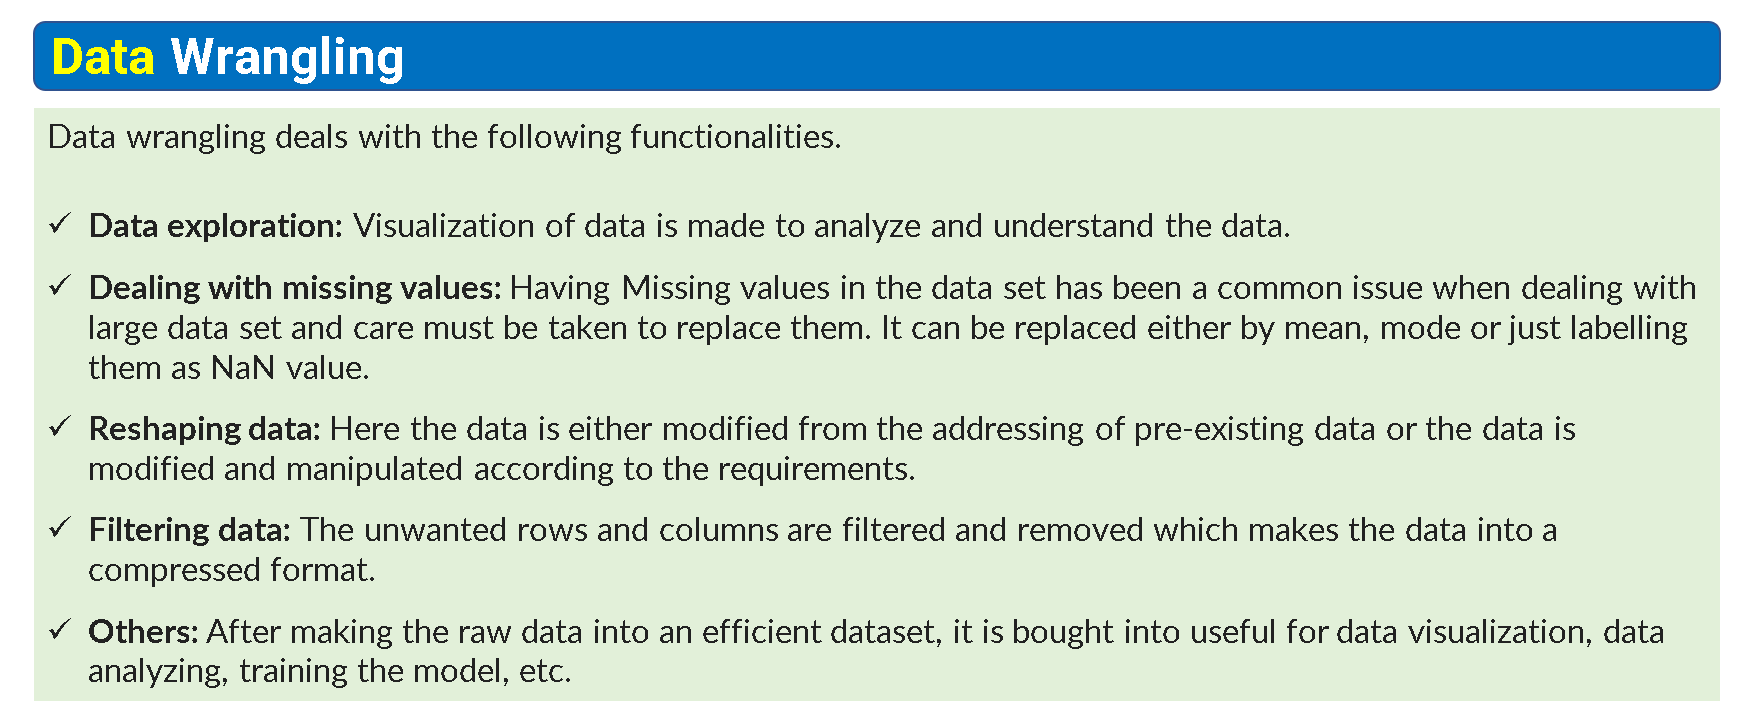


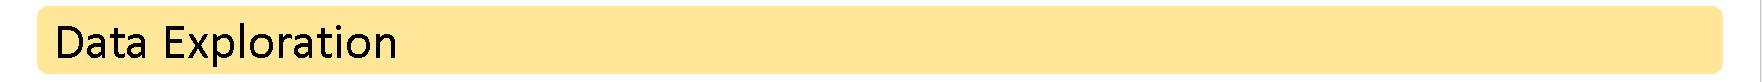

  **We have already performed below activities, which consist of Data Exploration part :**

  1. First view of Data (Head | Tail | Random)
  2. Data Dimensions (Rows and Columns)
  3. Data Impurities (Missing values & Duplicates)
  4. Mathematical description of Data
  5. Description of all Variables

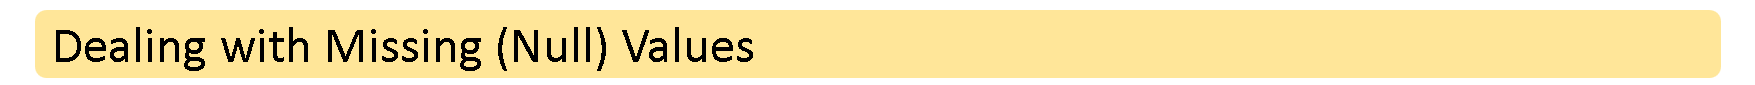

-------

The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

Another most important reason is data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data.

There are various methods to treat missing values in the data on the basis of the type of the data like Categorical(Nominal), Categorical (Ordinal), Numerical (Discrete), Numerical (Continuous).


**We can check the datatype, importance of the features / record, quantum of the missing values and deal with the missing values in below manner :**

1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values 
6. Prediction of missing values

------

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def store_1():
  temp = pd.DataFrame(index =store_df.columns)
  temp['Data_Type'] = store_df.dtypes
  temp['Unique_Count'] = store_df.nunique()
  temp['Count']= store_df.isnull().count()
  temp['Missing_Count'] = store_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2) 
  return temp
store_1()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
Store,int64,1115,1115,0,0.00
StoreType,object,4,1115,0,0.00
Assortment,object,3,1115,0,0.00
CompetitionDistance,float64,654,1115,3,0.27
CompetitionOpenSinceMonth,float64,12,1115,354,31.75
CompetitionOpenSinceYear,float64,23,1115,354,31.75
Promo2,int64,2,1115,0,0.00
Promo2SinceWeek,float64,24,1115,544,48.79
Promo2SinceYear,float64,7,1115,544,48.79
PromoInterval,object,3,1115,544,48.79


Found missing values in below variables,

1. CompetitionDistance
2. CompetitionOpenSinceMonth
3. CompetitionOpenSinceYear
4. Promo2SinceWeek
5. Promo2SinceYear
6. PromoInterval

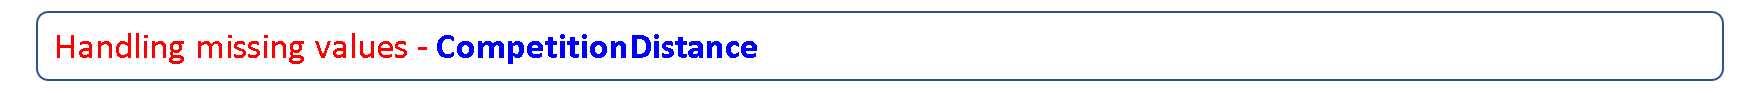

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

In [ ]:
# Let's check distribution plot of competition distance
# to check whether feature is guassian or normal distributed
# will also check "Skweness" of the same for better understanding of data distribution

def plot_data(df,feature):
    plt.figure(figsize=(20,6))
    print(f"Actual {feature} Distribution")
    plt.subplot(1,2,1)
    sns.distplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()

Actual CompetitionDistance Distribution


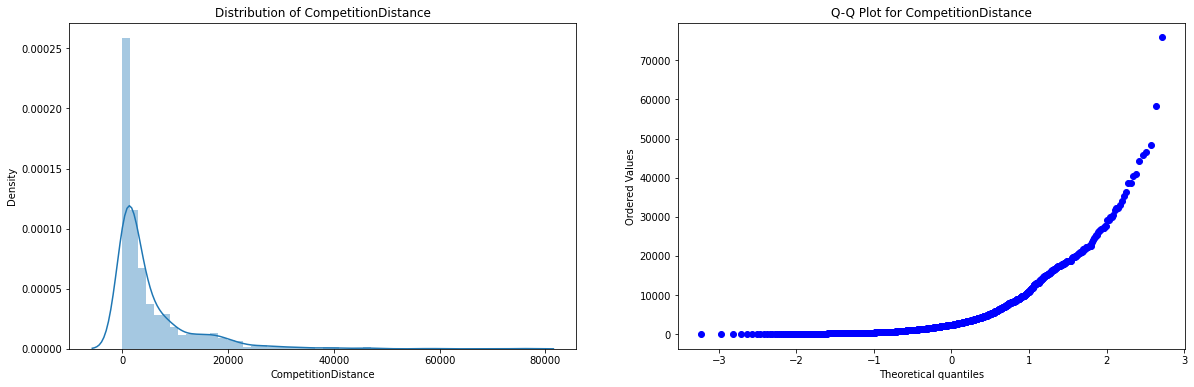

In [ ]:
plot_data(store_df,'CompetitionDistance')

In [ ]:
print(f"Skweness for the variable: CompetitionDistance ")
print(store_df['CompetitionDistance'].skew())

Skweness for the variable: CompetitionDistance 
2.9292856455312055


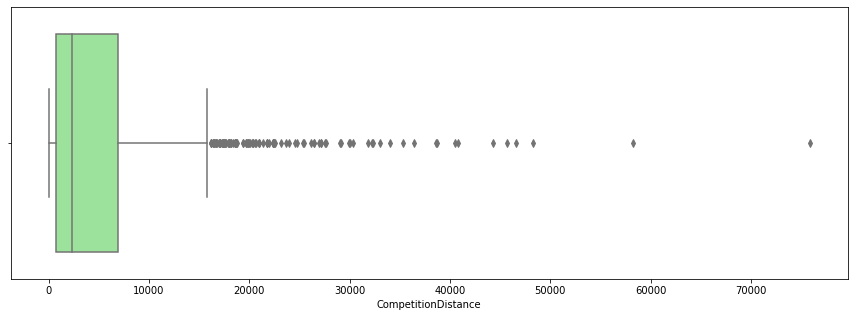

In [ ]:
# Above plot shows presence of large no of outliers, let's check the same with the help of Boxplot

plt.figure(figsize = (15,5))
sns.boxplot(store_df['CompetitionDistance'], color='lightgreen')
plt.show()

-------

As per above plots, we can conclude that, 

1. Skewness of the distribution shows that data is highly skwed towards right.

2. There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out.

3. Now, we can impute this numerical data by Median / Mode. As imputation of "Median" is more robust to outlier effect and this is a continuous numerical variable, it willl be appropriate to eeplace "NaN" values with "Median" value of the variable.

In [ ]:
# Replacing NaN competition distance values with the median value

store_df['CompetitionDistance'].median()

2325.0

In [ ]:
# Replacing NaN competition distance values with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

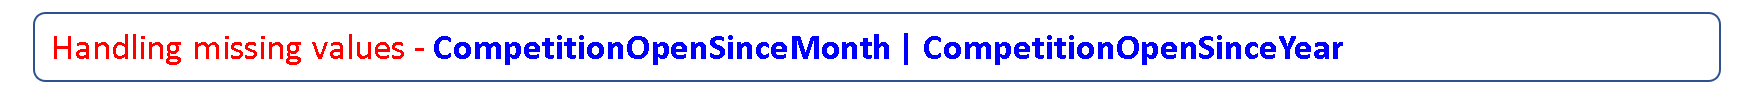

------

**Around 32% values are missing in below features,**

1. CompetitionOpenSinceMonth
2. CompetitionOpenSinceYear

As observed in feature wise unique values, these are categorical features.

Let's check categories within these features.

------

In [ ]:
# Let's check count of unique categories for variable - "CompetitionOpenSinceMonth"

store_df['CompetitionOpenSinceMonth'].nunique()

12

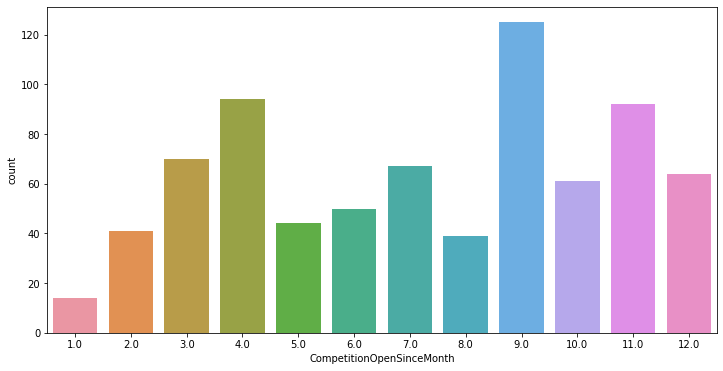

In [ ]:
# Countplot to check and understand categories of "CompetitionOpenSinceMonth" variable

plt.figure(figsize = (12,6))
sns.countplot(x=store_df["CompetitionOpenSinceMonth"])

-------

**As per above plots, we can say that,**

1. Other than NaN values, there are 12 categories in the Variable - "CompetitionOpenSinceMonth"

2. These categories indicates, the no. of the month, when competition got started and these missing values can be considered as 'Missing At Random" values.

**Here we have below 2 imputation methods to treat these missing values appropriately,**

1. Most frequent Category imputation
2. Impute 'Unknown' category

--------

**1. Most frequent category imputation -**

In this approach we can impute categorical feature to replace missing values with the most frequent / common class. But in this case values representing a timeline of start of the competition. 

Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

If this is the case, most-common-class imputing would cause this information to be lost. Hence imputing most frequent category can be ruled-out.

--------

**2. Impute 'Unknown' category -**

1. Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

3. It is also evident that missing values are huge in count i.e. 32%, that can be coseidered as an equivalent to independent category

4. In this approach we can impute a new categorical value / Zero, which can be considered as a kind of encoding for these missing values, which gives an important information of non-existence of competition for any month in given duration.

Accordingly, we can have 13 categories here, 12 months and 1 category of non-existence of competition.

--------

**Accordingly, replacing missing / null values of feature "CompetitionOpenSinceMonth" with "0"**

-------

We can investigate this feature in further analysis and can drop and convert it into meaningful features while performing feature engineering on merged dataframe.


In [ ]:
# Imputing missing values with new category "0"

store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

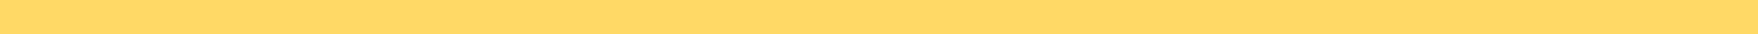

In [ ]:
# Let's check count of unique categories for variable - "CompetitionOpenSinceYear"

store_df['CompetitionOpenSinceYear'].nunique()

23

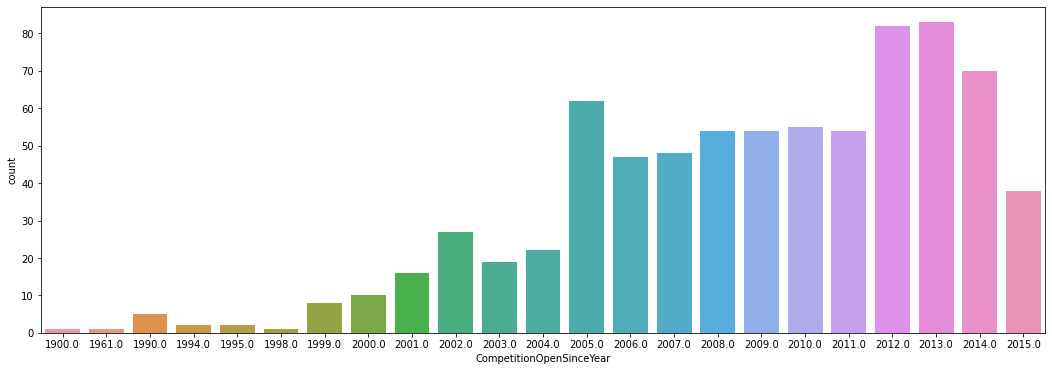

In [ ]:
# Countplot to check and understand categories of "CompetitionOpenSinceYear" variable

plt.figure(figsize = (18,6))
sns.countplot(x=store_df["CompetitionOpenSinceYear"])

-------

**As per above plots, we can say that,**

1. Other than NaN values, there are 23 categories (years) in the Variable - "CompetitionOpenSinceYear"

2. These categories indicates, the year, when competition got started and these missing values can be considered as 'Missing At Random" values.

**Here we have below 2 imputation methods to treat these missing values appropriately,**

1. Most frequent Category imputation
2. Impute 'Unknown' category

--------

**1. Most frequent category imputation -**

As per above plot and details, 

1. Missing value count is huge i.e. 32%

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

Like variable "CompetitionOpenSinceMonth", most-common-class imputing would cause this information to be lost. Hence imputing most frequent category can be ruled-out.

--------

**2. Impute 'Unknown' category -**

1. Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

3. It is also evident that missing values are huge in count i.e. 32%, that can be coseidered as an equivalent to independent category

4. In this approach we can impute a new categorical value / Zero, which can be considered as a kind of encoding for these missing values, which gives an important information of non-existence of competition for any month in given duration.

Accordingly, we can have 24 categories here, 23 year values and 1 category of non-existence of competition for any year.

--------

**Accordingly, replacing missing / null values of feature "CompetitionOpenSinceYear" with "0"**

-------

We can investigate this feature in further analysis and can drop and convert it into meaningful features while performing feature engineering on merged dataframe.

In [ ]:
# Imputing missing values with new category "0"

store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

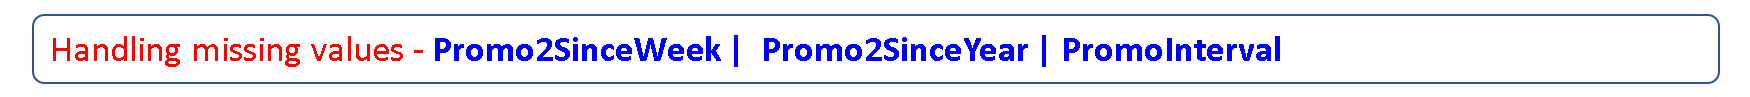

------

**Around 49% values are missing in below features,**

1. Promo2SinceWeek
2. Promo2sinceYear
3. PromoInterval

As observed in feature wise unique values, these are categorical features.

Let's check categories within these features.

------

In [ ]:
# Let's check count of unique categories for variable - "CompetitionOpenSinceMonth"

store_df['Promo2SinceWeek'].nunique()

24

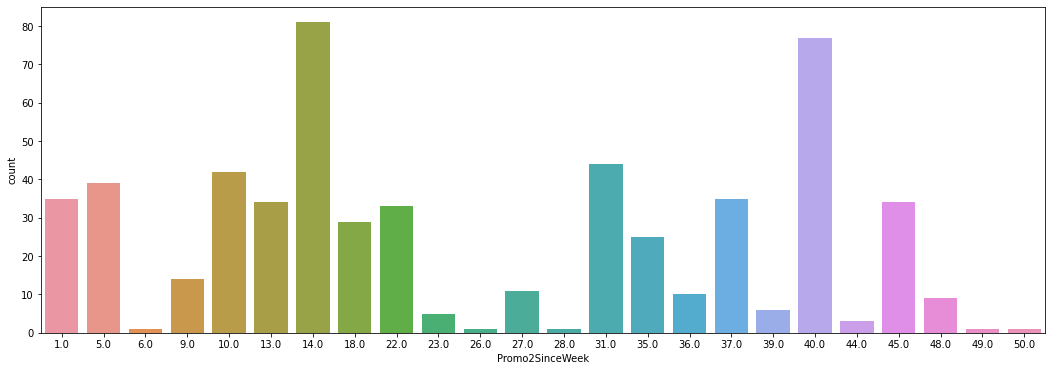

In [ ]:
# Countplot to check and understand categories of "CompetitionOpenSinceMonth" variable

plt.figure(figsize = (18,6))
sns.countplot(x=store_df["Promo2SinceWeek"])

-------

**As per above plots, we can say that,**

1. Other than NaN values, there are 23 categories (years) in the Variable - "CompetitionOpenSinceYear"

2. These categories indicates, the year, when competition got started and these missing values can be considered as 'Missing At Random" values.

**Here we have below 2 imputation methods to treat these missing values appropriately,**

1. Most frequent Category imputation
2. Impute 'Unknown' category

--------

**1. Most frequent category imputation -**

As per above plot and details, 

1. Missing value count is huge i.e. 32%

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

Like variable "CompetitionOpenSinceMonth", most-common-class imputing would cause this information to be lost. Hence imputing most frequent category can be ruled-out.

--------

**2. Impute 'Unknown' category -**

1. Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

3. It is also evident that missing values are huge in count i.e. 32%, that can be coseidered as an equivalent to independent category

4. In this approach we can impute a new categorical value / Zero, which can be considered as a kind of encoding for these missing values, which gives an important information of non-existence of competition for any month in given duration.

Accordingly, we can have 24 categories here, 23 year values and 1 category of non-existence of competition for any year.

--------

**Accordingly, replacing missing / null values of feature "CompetitionOpenSinceYear" with "0"**

-------

We can investigate this feature in further analysis and can drop and convert it into meaningful features while performing feature engineering on merged dataframe.

In [ ]:
# Let's check count of unique categories for variable - "PromoInterval"

store_df['PromoInterval'].nunique()

3

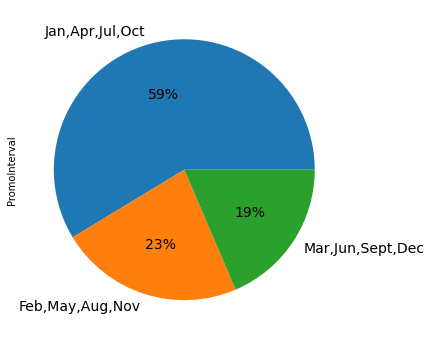

In [ ]:
# Countplot to check and understand categories of "PromoInterval" variable

plt.figure(figsize= (10,6))
store_df["PromoInterval"].value_counts().plot(kind='pie', autopct="%.0f%%", fontsize=14)

-------

**As per above plots, we can say that,**

1. Other than NaN values, there are 23 categories (years) in the Variable - "CompetitionOpenSinceYear"

2. These categories indicates, the year, when competition got started and these missing values can be considered as 'Missing At Random" values.

**Here we have below 2 imputation methods to treat these missing values appropriately,**

1. Most frequent Category imputation
2. Impute 'Unknown' category

--------

**1. Most frequent category imputation -**

As per above plot and details, 

1. Missing value count is huge i.e. 32%

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

Like variable "CompetitionOpenSinceMonth", most-common-class imputing would cause this information to be lost. Hence imputing most frequent category can be ruled-out.

--------

**2. Impute 'Unknown' category -**

1. Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

3. It is also evident that missing values are huge in count i.e. 32%, that can be coseidered as an equivalent to independent category

4. In this approach we can impute a new categorical value / Zero, which can be considered as a kind of encoding for these missing values, which gives an important information of non-existence of competition for any month in given duration.

Accordingly, we can have 24 categories here, 23 year values and 1 category of non-existence of competition for any year.

--------

**Accordingly, replacing missing / null values of feature "CompetitionOpenSinceYear" with "0"**

-------

We can investigate this feature in further analysis and can drop and convert it into meaningful features while performing feature engineering on merged dataframe.

In [ ]:
# Let's check count of unique categories for variable - "CompetitionOpenSinceMonth"

store_df['Promo2SinceYear'].nunique()

7

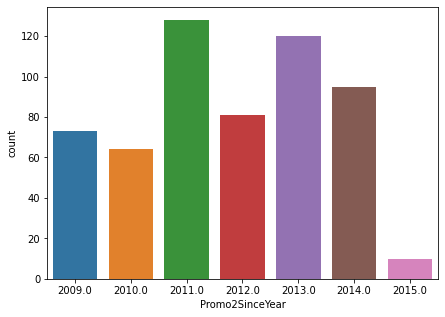

In [ ]:
# Countplot to check and understand categories of "CompetitionOpenSinceMonth" variable

plt.figure(figsize = (7,5))
sns.countplot(x=store_df["Promo2SinceYear"])

-------

**As per above plots, we can say that,**

1. Other than NaN values, there are 23 categories (years) in the Variable - "CompetitionOpenSinceYear"

2. These categories indicates, the year, when competition got started and these missing values can be considered as 'Missing At Random" values.

**Here we have below 2 imputation methods to treat these missing values appropriately,**

1. Most frequent Category imputation
2. Impute 'Unknown' category

--------

**1. Most frequent category imputation -**

As per above plot and details, 

1. Missing value count is huge i.e. 32%

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

Like variable "CompetitionOpenSinceMonth", most-common-class imputing would cause this information to be lost. Hence imputing most frequent category can be ruled-out.

--------

**2. Impute 'Unknown' category -**

1. Sometimes a categorical feature’s missing-ness itself is valuable information that should be explicitly encoded. 

2. If we see this variable as a whole in given plot, missing values looks like a category, which provides a valuebale infomration that, wherever there is a null value, it shows that there were no competition open.

3. It is also evident that missing values are huge in count i.e. 32%, that can be coseidered as an equivalent to independent category

4. In this approach we can impute a new categorical value / Zero, which can be considered as a kind of encoding for these missing values, which gives an important information of non-existence of competition for any month in given duration.

Accordingly, we can have 24 categories here, 23 year values and 1 category of non-existence of competition for any year.

--------

**Accordingly, replacing missing / null values of feature "CompetitionOpenSinceYear" with "0"**

-------

We can investigate this feature in further analysis and can drop and convert it into meaningful features while performing feature engineering on merged dataframe.

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***